>[1. Introduction](#scrollTo=lcnVfOsB3Eea)

>>[1.1 Objective](#scrollTo=TN4qD2DW8Ord)

>>[1.2 Dataset Overview](#scrollTo=UiMUQRRqQxef)

>[2. Environment Setup](#scrollTo=d76DDjVx5NU3)

>>[2.1 Import Libraries](#scrollTo=fThtICyR5744)

>>[2.2 Configuration](#scrollTo=--RF5Rpb-dKF)

>[3. Data Exploration and Understanding](#scrollTo=WT5FwGyE6Qa2)

>>[3.1 Load the Data](#scrollTo=Q8-ZxHR-8BJN)

>>[3.2 Summary Statistics](#scrollTo=WoEnqYGD93NK)

>>[3.3 Target Variable Analysis](#scrollTo=W4UMyrQHEALz)

>>[3.4 Feature-Target Relationships](#scrollTo=_lPAEXnsE2Kv)

>>>[3.4.1 Demographic Features](#scrollTo=9ZvkzaIkE-fX)

>>>[3.4.2 Medical Features](#scrollTo=zA2pvwa3Hr4M)

>>>[3.4.3 Treatment History](#scrollTo=3tTuPHvaTlvL)

>>>[3.4.4 Lifestyle Features](#scrollTo=GB1uPWxxSM0O)

>>[3.5 Correlation Analysis](#scrollTo=D_oYI4_qT-sw)

>>[3.6 Cramer's V Analysis](#scrollTo=4aSrXM9LYnuX)

>[4. Preprocessing and Feature Engineering](#scrollTo=PZHFLOSbFvHZ)

>>[4.1 Split Train Test Data](#scrollTo=GWchRkrMBH8B)

>>[4.2 Handle Missing Values](#scrollTo=jv9_WKPZYLjW)

>>[4.3 Scaling and Encoding](#scrollTo=xAVxcKoUZYmP)

>>[4.4 Feature Selection](#scrollTo=iXe1by8PW5OG)

>>>[4.4.1 Univariate Feature Selection](#scrollTo=JC_N8hlJfAfd)

>>>[4.4.2 Mutual Information Selection](#scrollTo=m7znEjXsfId_)

>>>[4.3.3 Random Forest Feature Importance](#scrollTo=UFYhMMHhfdBL)

>[5. Model Implementation and Evaluation](#scrollTo=t8YY0yDxgTku)



# **1. Introduction**

## 1.1 Objective

In This project we develop a robust machine learning model to predict survival outcomes for cancer patients. Using a dataset containing patient demographics, diagnosis details, treatment history, and various examination results, our primary goal is to accurately classify the label(Survival_Status) for each individual, where `1` signifies `Alive` and `0` signifies
`Deceased`.


## 1.2 Dataset Overview

**Data Source**: [Kaggle Competition Link](https://www.kaggle.com/competitions/ds-ca-3-q-1)

| Feature Name          | Description |
|-----------------------|------------|
| **Birth_Date**        | The patient's date of birth. |
| **Weight**           | The patient's weight measurement. |
| **Height**           | The patient's height. |
| **Urban_Rural**      | Indicates whether the patient lives in an urban or rural area. |
| **Occupation**       | The patient's profession. |
| **Insurance_Type**   | The type of health insurance the patient holds. |
| **Family_History**   | Indicates whether there is a family history of cancer. |
| **Cancer_Type**      | Specifies the type of cancer diagnosed in the patient. |
| **Stage_at_Diagnosis** | Describes the cancer stage at the time of diagnosis. |
| **Diagnosis_Date**    | The date when the cancer diagnosis was made. |
| **Symptoms**         | The reported symptoms at diagnosis or during disease progression. |
| **Tumor_Size**       | The size of the tumor. |
| **Surgery_Date**     | The date on which surgery was performed. |
| **Chemotherapy_Drugs** | Lists the chemotherapy drugs administered to the patient. |
| **Radiation_Sessions** | The count of radiation therapy sessions the patient received. |
| **Immunotherapy**     | Indicates whether the patient underwent immunotherapy treatment. |
| **Targeted_Therapy**  | Indicates whether the patient received targeted therapy, designed to attack specific cancer cells. |
| **Recurrence_Status** | Indicates whether the cancer has recurred following initial treatment. |
| **Smoking_History**   | Information about the patient's smoking habits. |
| **Alcohol_Use**       | Details regarding the patient's alcohol consumption. |
| **label(Survival_Status)** | The current survival outcome of the patient (1 = alive, 0 = deceased). |x

# **2. Environment Setup**

## 2.1 Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## 2.2 Configuration

In [ ]:
RANDOM_SEED=42

# **3. Data Exploration and Understanding**

## 3.1 Load the Data

In [ ]:
df = pd.read_csv('train_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  26473 non-null  int64  
 1   Birth_Date          26473 non-null  object 
 2   Weight              26473 non-null  float64
 3   Height              26473 non-null  object 
 4   Urban_Rural         26473 non-null  object 
 5   Occupation          26473 non-null  object 
 6   Insurance_Type      26473 non-null  object 
 7   Family_History      26473 non-null  object 
 8   Cancer_Type         26473 non-null  object 
 9   Stage_at_Diagnosis  26473 non-null  object 
 10  Diagnosis_Date      26473 non-null  object 
 11  Symptoms            25972 non-null  object 
 12  Tumor_Size          26473 non-null  float64
 13  Surgery_Date        18898 non-null  object 
 14  Chemotherapy_Drugs  22423 non-null  object 
 15  Radiation_Sessions  26473 non-null  int64  
 16  Immu

In [ ]:
df.head()

,id,Birth_Date,Weight,Height,Urban_Rural,Occupation,Insurance_Type,Family_History,Cancer_Type,Stage_at_Diagnosis,...,Tumor_Size,Surgery_Date,Chemotherapy_Drugs,Radiation_Sessions,Immunotherapy,Targeted_Therapy,Recurrence_Status,Smoking_History,Alcohol_Use,label
0,1,1994-07-01,64.9,155.0cm,Urban,Unemployed,UEBMI,No,Breast,II,...,8.0,2024-10-19,"Paclitaxel,Docetaxel,Doxorubicin",16,No,Yes,NO,Never,Regular,1
1,2,1992-07-16,61.4,171.0cm,Urban,Factory Worker,UEBMI,Yes,Breast,I,...,10.0,2021-02-28,"Cyclophosphamide,Paclitaxel,Doxorubicin,Docetaxel",10,No,No,Yes,Former,Regular,1
2,3,1948-06-23,60.7,170.0cm,Rural,Unemployed,NRCMS,No,Stomach,IV,...,13.0,2022-09-25,"Fluorouracil,Cisplatin",21,Yes,No,NO,Former,Never,0
3,4,1954-11-26,70.2,171.0cm,Urban,Farmer,URBMI,Yes,Cervical,IV,...,3.0,2024-09-13,Cisplatin,10,No,Yes,NO,Never,Regular,1
4,5,1979-07-08,100.3,186.0cm,Rural,Office Worker,Self-pay,Yes,Lung,II,...,12.0,2023-12-08,"Gemcitabine,Carboplatin",6,Yes,No,Yes,Former,Never,0


## 3.2 Summary Statistics

In [ ]:
df.describe()

,id,Weight,Tumor_Size,Radiation_Sessions,label
count,26473.000000,26473.000000,26473.000000,26473.000000,26473.000000
mean,13237.000000,73.790794,7.737438,11.991841,0.485740
std,7642.241174,21.360083,4.161065,7.736559,0.499806
min,1.000000,31.500000,0.500000,0.000000,0.000000
25%,6619.000000,57.000000,4.000000,6.000000,0.000000
50%,13237.000000,72.100000,8.000000,12.000000,0.000000
75%,19855.000000,88.400000,11.000000,17.000000,1.000000
max,26473.000000,133.100000,15.000000,29.000000,1.000000


In [ ]:
df.describe(include='object')

,Birth_Date,Height,Urban_Rural,Occupation,Insurance_Type,Family_History,Cancer_Type,Stage_at_Diagnosis,Diagnosis_Date,Symptoms,Surgery_Date,Chemotherapy_Drugs,Immunotherapy,Targeted_Therapy,Recurrence_Status,Smoking_History,Alcohol_Use
count,26473,26473,26473,26473,26473,26473,26473,26473,26473,25972,18898,22423,26473,26473,26473,26473,26473
unique,16050,46,2,5,4,2,7,4,4379,5,1747,154,2,2,2,3,3
top,1800-01-01 00:00:00,179.0cm,Urban,Unemployed,UEBMI,No,Breast,II,2018-07-04,Blood in Stool,2022-09-28,"Gemcitabine, Carboplatin",No,No,Yes,Never,Never
freq,87,621,14246,5403,6630,15197,4182,7091,16,5298,22,2845,14304,15291,13508,10534,11469


## 3.3 Target Variable Analysis

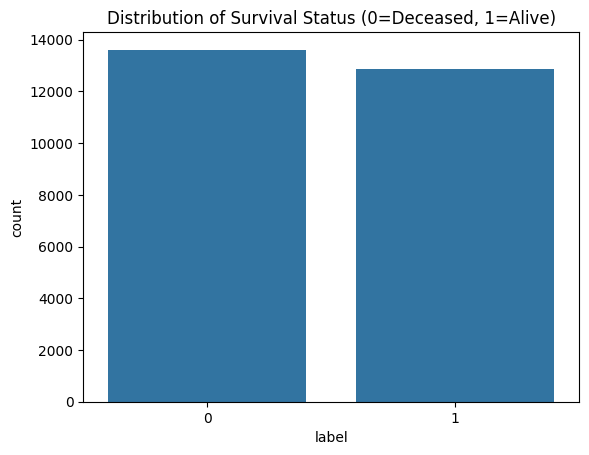

label
0    0.51426
1    0.48574
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Survival Status (0=Deceased, 1=Alive)')
plt.show()
print(df['label'].value_counts(normalize=True))

## 3.4 Feature-Target Relationships


### 3.4.1 Demographic Features

- Age

In [ ]:
df['Diagnosis_Date'] = pd.to_datetime(
    df['Diagnosis_Date'].str.split().str[0],
    format='%Y-%m-%d',
    errors='coerce'
)

df['Birth_Date'] = pd.to_datetime(
    df['Birth_Date'].str.split().str[0],
    format='%Y-%m-%d',
    errors='coerce'
)

df['Age'] = (
    (df['Diagnosis_Date'] - df['Birth_Date']).dt.days / 365.25
).round(1)

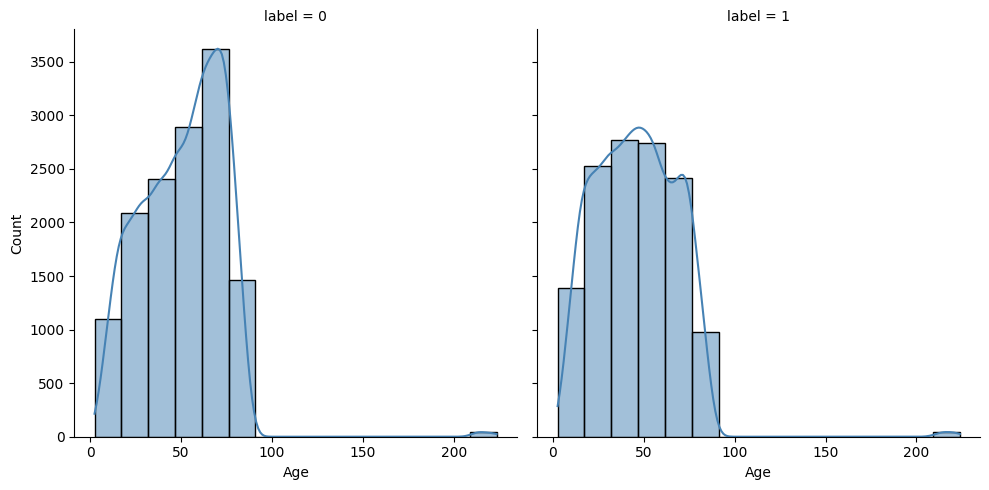

In [ ]:
g = sns.FacetGrid(df, col='label', height=5)
g.map(sns.histplot, 'Age', kde=True,
      bins=15, color='steelblue')

- Weight/Height (BMI)

In [ ]:
df['Height_cm'] = df['Height'].str.replace('cm', '').astype(float)
df['Height_m'] = df['Height_cm'] / 100
df = df.drop(['Height', 'Height_cm'], axis=1)
df['BMI'] = df['Weight'] / (df['Height_m']**2)

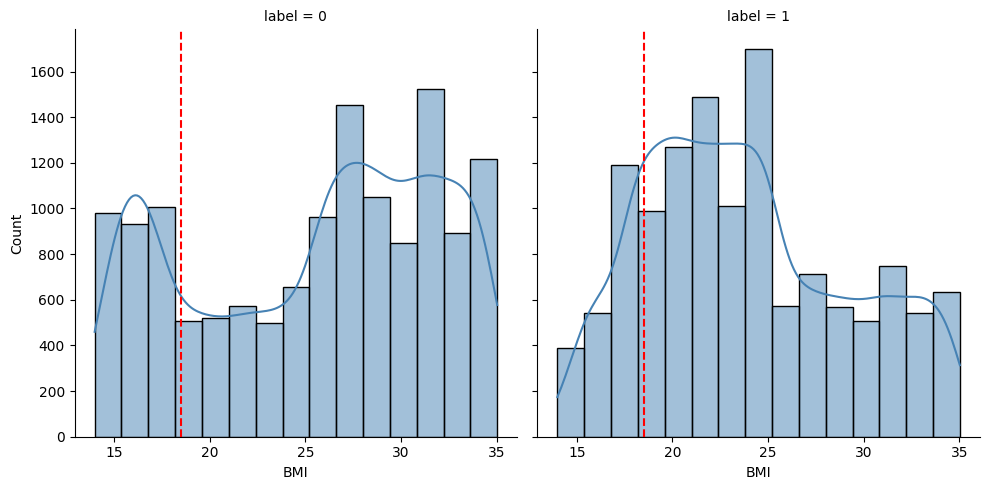

In [ ]:
g = sns.FacetGrid(df, col='label', height=5)
g.map(sns.histplot, 'BMI', kde=True,
      bins=15, color='steelblue')
g.axes[0,0].axvline(18.5, color='red', linestyle='--')
g.axes[0,1].axvline(18.5, color='red', linestyle='--')

### 3.4.2 Medical Features

- Cancer Type

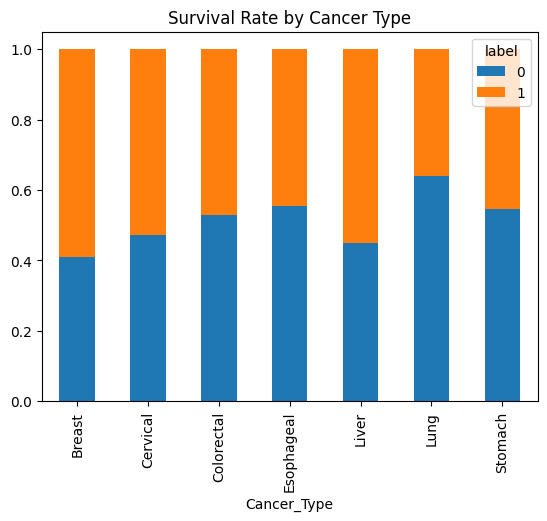

In [ ]:
pd.crosstab(df['Cancer_Type'],
            df['label'],
            normalize='index').plot(kind='bar', stacked=True)
plt.title('Survival Rate by Cancer Type')
plt.show()

- Stage

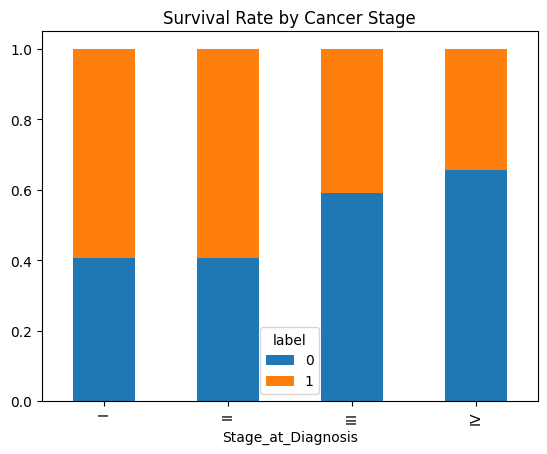

In [ ]:
pd.crosstab(df['Stage_at_Diagnosis'],
            df['label'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Survival Rate by Cancer Stage')
plt.show()

- Tumor Size

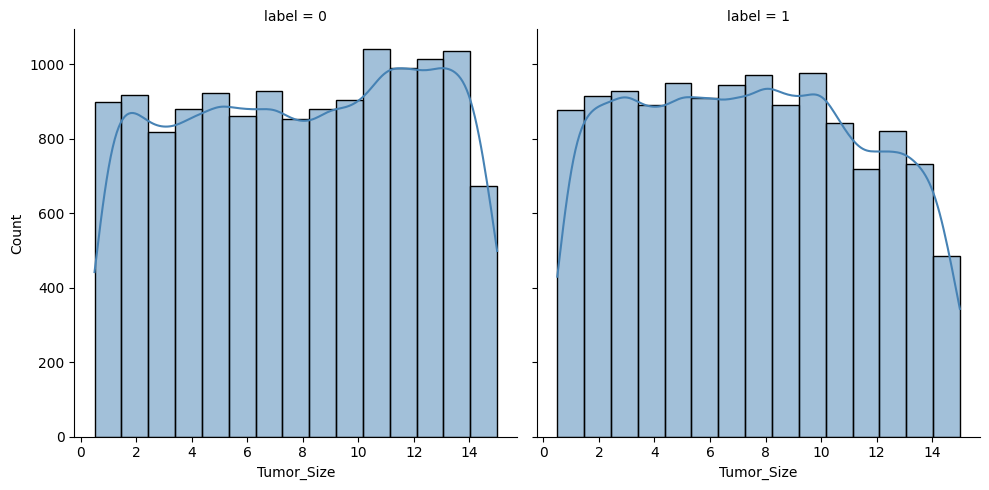

In [ ]:
g = sns.FacetGrid(df, col='label', height=5)
g.map(sns.histplot, 'Tumor_Size', kde=True,
      bins=15, color='steelblue')
plt.show()

### 3.4.3 Treatment History

- Radiation Session

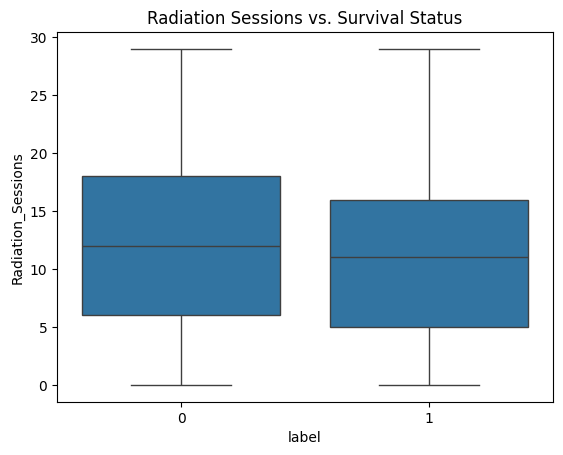

In [ ]:
sns.boxplot(x='label', y='Radiation_Sessions', data=df)
plt.title('Radiation Sessions vs. Survival Status')
plt.show()

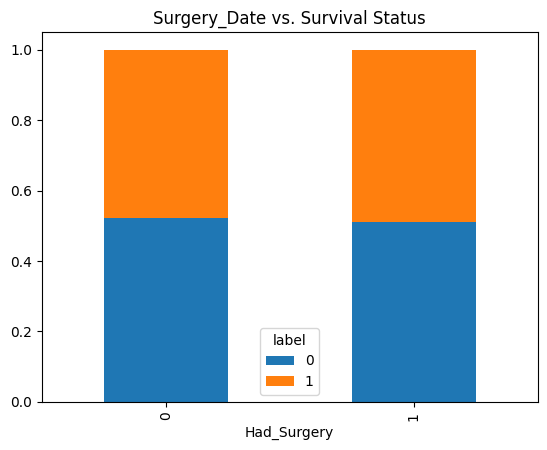

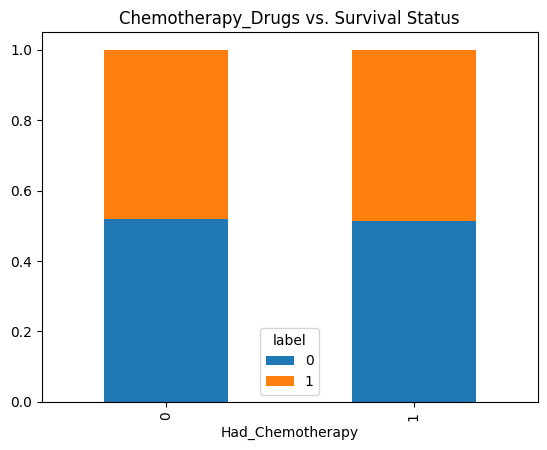

In [ ]:
for feature in ['Surgery_Date', 'Chemotherapy_Drugs',]:
  temp_feature = 'Had_' + feature.split('_')[0]
  df[temp_feature] = df[feature].notnull().astype(int)
  pd.crosstab(df[temp_feature], df['label'], normalize='index').plot(kind='bar', stacked=True)
  plt.title(f'{feature} vs. Survival Status')
  plt.show()

### 3.4.4 Lifestyle Features

- Smokig/Alchohol

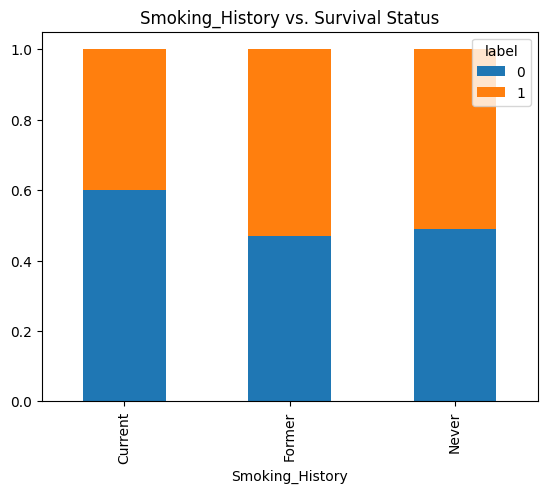

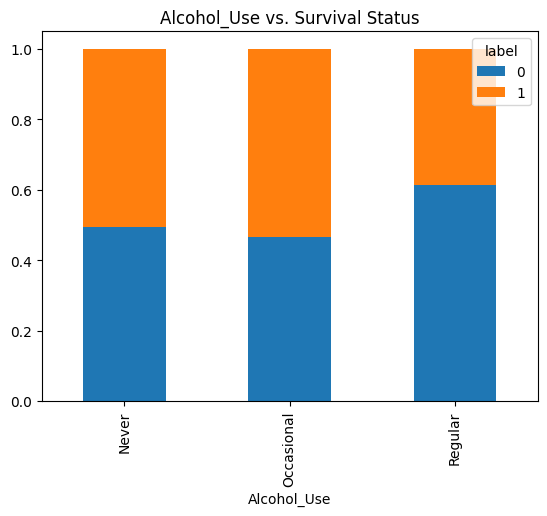

In [ ]:
for feature in ['Smoking_History', 'Alcohol_Use']:
    pd.crosstab(df[feature], df['label'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs. Survival Status')
    plt.show()

## 3.5 Correlation Analysis

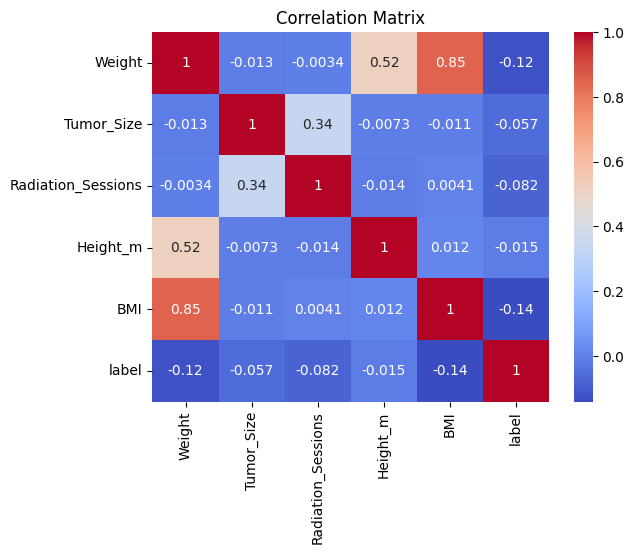

In [ ]:
num_features = ['Weight', 'Tumor_Size', 'Radiation_Sessions', 'Height_m', 'BMI']
corr_matrix = df[num_features + ['label']].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3.6 Cramer's V Analysis

**Cramer’s V** is a **normalized measure of association** between two **categorical variables**, ranging from **0 (no association)** to **1 (perfect association)**. It is derived from the **Chi-Square $χ²$ statistic** but adjusts for sample size and table dimensions, making it comparable across different studies.  


$$
V = \sqrt{\frac{\chi^2}{n \times \min(k-1, r-1)}}
$$

**Where:**  
- $chi^2$ = Chi-Square test statistic  
- $n$ = Total number of observations  
- $k$ = Number of categories in the **first variable**  
- $r$ = Number of categories in the **second variable**  
- $\min(k-1, r-1)$ = Degrees of freedom adjustment  



In [ ]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

categorical_results = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['label'])
    v = cramers_v(contingency_table)

    categorical_results.append({
        'Feature': feature,
        'Cramers_V': v,\
    })

categorical_df = pd.DataFrame(categorical_results)
print("\nCategorical Features Association with Survival_Status:")
print((
    categorical_df
    .sort_values(by='Cramers_V', ascending=False)
    .reset_index(drop=True)
    ))


Categorical Features Association with Survival_Status:
               Feature  Cramers_V
0         Surgery_Date   0.306756
1   Chemotherapy_Drugs   0.278517
2   Stage_at_Diagnosis   0.220674
3          Cancer_Type   0.145253
4          Alcohol_Use   0.114858
5      Smoking_History   0.107562
6           Occupation   0.053252
7    Recurrence_Status   0.048816
8             Symptoms   0.016602
9       Insurance_Type   0.013648
10    Targeted_Therapy   0.007490
11       Immunotherapy   0.007056
12         Urban_Rural   0.003086
13      Family_History   0.000656


# **4. Preprocessing and Feature Engineering**

The goal is Identify the most predictive features and create new ones to improve model performance.

## 4.1 Split Train Test Data

In [ ]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 4.2 Handle Missing Values

In [ ]:
df.isnull().sum()

,0
id,0
Birth_Date,0
Weight,0
Urban_Rural,0
Occupation,0
Insurance_Type,0
Family_History,0
Cancer_Type,0
Stage_at_Diagnosis,0
Diagnosis_Date,0


- Symptoms

Fill null columns with No_Symptoms

In [ ]:
X_train['Symptoms'] = X_train['Symptoms'].fillna("No_Symptoms")
X_test['Symptoms'] = X_test['Symptoms'].fillna("No_Symptoms")

In [ ]:
print(X_train['Symptoms'].isnull().sum())
print(X_test['Symptoms'].isnull().sum())

0
0


- Surgery Date

Adding new feature `Time_to_surgery` and set far future date for surgery_date to increa

In [ ]:
def handle_surgery_date_missing_value(df: pd.DataFrame) -> pd.DataFrame:
    copy_df = df.copy()
    copy_df['Surgery_Date'] = copy_df['Surgery_Date'].fillna("2100-01-01")
    copy_df['Surgery_Date'] = pd.to_datetime(
        copy_df['Surgery_Date'].str.split().str[0],
        format='%Y-%m-%d',
        errors='coerce'
    )

    copy_df['time_to_surgery'] = (
        (copy_df['Surgery_Date'] - copy_df['Diagnosis_Date']).dt.days / 365.25
    ).round(1).astype(int)

    conditions = [
        copy_df['time_to_surgery'] <= 14,
        (copy_df['time_to_surgery'] > 14) & (copy_df['time_to_surgery'] <= 30),
        (copy_df['time_to_surgery'] > 30) & (copy_df['time_to_surgery'] <= 1000),
        copy_df['time_to_surgery'] > 1000
    ]

    choices = [
        'early_surgery(<14d)',
        'intermediate_surgery(14-30d)',
        'late_surgery(>30d)',
        'no_surgery'
    ]


    copy_df['surgery_timing_group'] = np.select(
        conditions,
        choices,
        default='no_surgery'
    )

    return copy_df

In [ ]:
X_train = handle_surgery_date_missing_value(X_train)

In [ ]:
X_test = handle_surgery_date_missing_value(X_test)

In [ ]:
print(X_train['surgery_timing_group'].isnull().sum())

0


In [ ]:
print(X_test['surgery_timing_group'].isnull().sum())

0


- Chemotherapy_Drugs

In [ ]:
X_train['Chemotherapy_Drugs'] = X_train['Chemotherapy_Drugs'].dropna().str.split(',')

In [ ]:
X_test['Chemotherapy_Drugs'] = X_test['Chemotherapy_Drugs'].dropna().str.split(',')

In [ ]:
def impute_chemotherapy_drugs(train_df):
    result_df = train_df.copy()
    empty_mask = result_df['Chemotherapy_Drugs'].isna() | (result_df['Chemotherapy_Drugs'] == '')

    if not empty_mask.any():
        return result_df
    features = ['Cancer_Type', 'Stage_at_Diagnosis', 'Radiation_Sessions',
               'Immunotherapy', 'Targeted_Therapy']
    X = pd.get_dummies(result_df[features], dummy_na=True)

    mlb = MultiLabelBinarizer()
    known_drugs = result_df.loc[~empty_mask, 'Chemotherapy_Drugs'].dropna()


    drugs_encoded = pd.DataFrame(
        mlb.fit_transform(known_drugs),
        columns=mlb.classes_,
        index=known_drugs.index
    )

    result_df = result_df.join(drugs_encoded)

    for drug in drugs_encoded.columns:
        train_idx = ~empty_mask & result_df['Chemotherapy_Drugs'].notna()
        if result_df.loc[train_idx, drug].sum() > 1:
            clf = RandomForestClassifier(n_estimators=100, random_state=0)
            clf.fit(X.loc[train_idx], result_df.loc[train_idx, drug])
            result_df.loc[empty_mask, drug] = clf.predict(X.loc[empty_mask])

    def get_drug_list(row):
        if not empty_mask[row.name]:
            return row['Chemotherapy_Drugs']
        drugs = [d for d in drugs_encoded.columns if row.get(d, 0) == 1]
        return drugs if drugs else 'No_chemo'

    result_df['Chemotherapy_Drugs'] = [get_drug_list(row) for _, row in result_df.iterrows()]

    result_df.drop(columns=drugs_encoded.columns, errors='ignore', inplace=True)

    return result_df

In [ ]:
X_train = impute_chemotherapy_drugs(X_train)

In [ ]:
X_test = impute_chemotherapy_drugs(X_test)

In [ ]:
print(X_train['Chemotherapy_Drugs'].isnull().sum())

0


In [ ]:
print(X_test['Chemotherapy_Drugs'].isnull().sum())

0


In [ ]:
X_train.isnull().sum()

,0
id,0
Birth_Date,0
Weight,0
Urban_Rural,0
Occupation,0
Insurance_Type,0
Family_History,0
Cancer_Type,0
Stage_at_Diagnosis,0
Diagnosis_Date,0


In [ ]:
X_test.isnull().sum()

,0
id,0
Birth_Date,0
Weight,0
Urban_Rural,0
Occupation,0
Insurance_Type,0
Family_History,0
Cancer_Type,0
Stage_at_Diagnosis,0
Diagnosis_Date,0


## 4.3 Scaling and Encoding

In [ ]:
X_train.drop(["id", "Birth_Date", "Surgery_Date", "Had_Surgery",
              "Had_Chemotherapy", "Diagnosis_Date"],
             axis=1, inplace=True)

In [ ]:
def identify_column_types(df: pd.DataFrame) -> pd.DataFrame:
    column_types = {
        'numerical': df.select_dtypes(include=['int64', 'float64']).columns,
        'binary': [],
        'single_categorical': [],
        'multi_categorical': []
    }

    for col in df.select_dtypes(include=['object']).columns:
        is_multi_cat = col == 'Chemotherapy_Drugs'

        if is_multi_cat:
            column_types['multi_categorical'].append(col)
        else:
            unique_count = df[col].nunique()
            if unique_count == 2:
                column_types['binary'].append(col)
            elif unique_count < 10:  # Threshold for single categorical
                column_types['single_categorical'].append(col)

    return column_types

In [ ]:
def scaling_numerical_columns(df, column_types):
  processed_df = df.copy()
  scaler = StandardScaler()
  processed_df[column_types['numerical']] = scaler.fit_transform(processed_df[column_types['numerical']])

  return processed_df

In [ ]:
def encoding_categorical_columns(df, column_types):
    processed_df = df.copy()

    for col in column_types['multi_categorical']:

        mlb = MultiLabelBinarizer()
        multi_encoded = mlb.fit_transform(processed_df[col])

        multi_cols = [f"{col}_{cat}" for cat in mlb.classes_]
        multi_encoded_df = pd.DataFrame(multi_encoded, columns=multi_cols, index=processed_df.index)

        processed_df = processed_df.drop(columns=[col])
        processed_df = pd.concat([processed_df, multi_encoded_df], axis=1)


    for col in column_types['binary']:
        le = LabelEncoder()
        processed_df[col] = le.fit_transform(processed_df[col])

    for col in column_types['single_categorical']:
        one_hot = pd.get_dummies(processed_df[col], prefix=col)
        processed_df = processed_df.drop(columns=[col])
        processed_df = pd.concat([processed_df, one_hot], axis=1)

    return processed_df

In [ ]:
column_types = identify_column_types(X_train)

In [ ]:
X_train = scaling_numerical_columns(X_train, column_types)

In [ ]:
X_train = encoding_categorical_columns(X_train, column_types)

In [ ]:
X_test = scaling_numerical_columns(X_test, column_types)

In [ ]:
X_test = encoding_categorical_columns(X_test, column_types)

## 4.4 Feature Selection

### 4.4.1 Univariate Feature Selection

Univariate feature selection evaluates each feature individually to determine its statistical relationship with the target variable using simple statistical tests like ANOVA F-test (f_classif) or chi-squared (chi2). It selects the top features based on these scores without considering feature interactions. This method is fast, easy to interpret, and useful when working with high-dimensional data, but it may overlook features that are only informative when combined with others.

In [ ]:
def univariate_feature_selection(X, y, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()]
    scores = pd.DataFrame({'Feature': X.columns, 'F_Score': selector.scores_})
    return selected_features, scores.sort_values('F_Score', ascending=False)

In [ ]:
anova_features = set(univariate_feature_selection(X_train, y_train, k=15)[0])

### 4.4.2 Mutual Information Selection

Mutual Information feature selection estimates how much information a feature provides about the target variable, capturing both linear and non-linear dependencies. Unlike univariate tests, it can detect subtle and complex relationships between features and the target. It's especially effective when the relationships are not strictly linear, although it can be computationally heavier and less interpretable compared to simpler tests.


In [ ]:
def mutual_info_selection(X, y, k=10):
    mi_scores = mutual_info_classif(X, y)
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
    top_features = mi_df.nlargest(k, 'MI_Score')['Feature'].values
    return top_features, mi_df.sort_values('MI_Score', ascending=False)

In [ ]:
mi_features = set(mutual_info_selection(X_train, y_train, k=15)[0])

### 4.3.3 Random Forest Feature Importance

Random Forest feature selection uses an ensemble of decision trees to determine the importance of each feature by measuring how much each one improves the model’s accuracy or reduces impurity when used in splits. It inherently captures non-linear relationships and feature interactions, making it a powerful and robust method for evaluating feature usefulness. However, it may be biased toward features with more levels or higher variance.

In [ ]:
def rf_feature_importance(X, y, n_estimators=100):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X, y)
    importance_df = pd.DataFrame({'Feature': X.columns,
                                'Importance': rf.feature_importances_})
    return importance_df.sort_values('Importance', ascending=False)

In [ ]:
rf_features = set(rf_feature_importance(X_train, y_train).head(15)['Feature'])

# **5. Model Implementation and Evaluation**

We Experiment with various binary classification
algorithms suitable for this task (Logistic Regression, SVM, Decision Trees). Compare their performance using appropriate validation strategies and select the model that yields the highest Accuracy on your validation set.


W also calculate and log Precision, Recall, and F1-Score during our model
development process. These metrics provide a more nuanced understanding of our model's strengths and weaknesses.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=3000,
                                              random_state=RANDOM_SEED),
    'SVM': SVC(random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED)
}

feature_sets = {
    'RF_Features': list(rf_features),
    'MI_Features': list(mi_features),
    'ANOVA_Features': list(anova_features),
}


results = []



for feature_set_name, features in feature_sets.items():
    print(f"\n=== Evaluating {feature_set_name} ===")
    print(f"Features used: {features}")

    X_train_fs = X_train[features].copy()
    X_test_fs = X_test[features].copy()

    for model_name, model in models.items():
        model.fit(X_train_fs, y_train)

        y_pred = model.predict(X_test_fs)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        cv_scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()

        results.append({
            'Feature Set': feature_set_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'CV Mean Accuracy': cv_mean,
            'Num Features': len(features)
        })


        print(f"{model_name}:")
        print(f"  Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
        print(f"  CV Accuracy: {cv_mean:.3f}")


results_df = pd.DataFrame(results)

best_model_idx = results_df['Accuracy'].idxmax()
best_model = results_df.loc[best_model_idx]

print("\n=== Final Results ===")
print(results_df.sort_values('Accuracy', ascending=False).head())

print("\n=== Best Model ===")
print(f"Feature Set: {best_model['Feature Set']}")
print(f"Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.3f}")
print(f"Precision: {best_model['Precision']:.3f}")
print(f"Recall: {best_model['Recall']:.3f}")
print(f"F1-Score: {best_model['F1']:.3f}")
print(f"CV Accuracy: {best_model['CV Mean Accuracy']:.3f}")
print(f"Number of Features: {best_model['Num Features']}")


=== Evaluating RF_Features ===
Features used: ['Age', 'Radiation_Sessions', 'Chemotherapy_Drugs_Fluorouracil', 'time_to_surgery', 'Smoking_History_Current', 'Stage_at_Diagnosis_IV', 'surgery_timing_group', 'Alcohol_Use_Regular', 'Weight', 'Stage_at_Diagnosis_II', 'Smoking_History_Never', 'Tumor_Size', 'BMI', 'Alcohol_Use_Never', 'Height_m']
Logistic Regression:
  Accuracy: 0.637, Precision: 0.626, Recall: 0.627, F1: 0.626
  CV Accuracy: 0.630
SVM:
  Accuracy: 0.733, Precision: 0.725, Recall: 0.726, F1: 0.725
  CV Accuracy: 0.740
Decision Tree:
  Accuracy: 0.683, Precision: 0.679, Recall: 0.660, F1: 0.670
  CV Accuracy: 0.688
Random Forest:
  Accuracy: 0.739, Precision: 0.739, Recall: 0.715, F1: 0.727
  CV Accuracy: 0.749

=== Evaluating MI_Features ===
Features used: ['Stage_at_Diagnosis_III', 'Stage_at_Diagnosis_I', 'Cancer_Type_Lung', 'Chemotherapy_Drugs_Doxorubicin', 'Radiation_Sessions', 'Tumor_Size', 'Stage_at_Diagnosis_II', 'Stage_at_Diagnosis_IV', 'Cancer_Type_Breast', 'Alcohol